In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
first_image = x_train[0]
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
first_image.shape

(28, 28)

(10000, 28, 28)

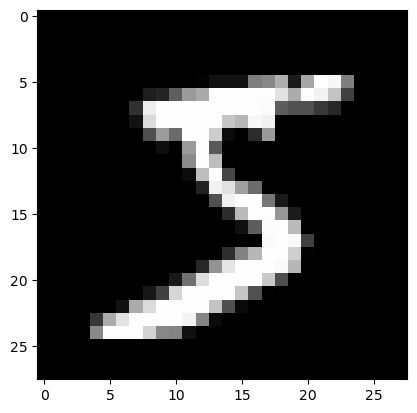

In [7]:
plt.imshow(first_image,cmap='gray')
x_test.shape

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
categ_y_train = to_categorical(y_train)
categ_y_train.shape

(60000, 10)

In [10]:
categ_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
first_image.max()

255

In [13]:
first_image.min()

0

In [14]:
X_train = x_train/255
x_test = x_test/255

In [15]:
first_image_esc = x_train[0]

In [16]:
first_image_esc.max()

255

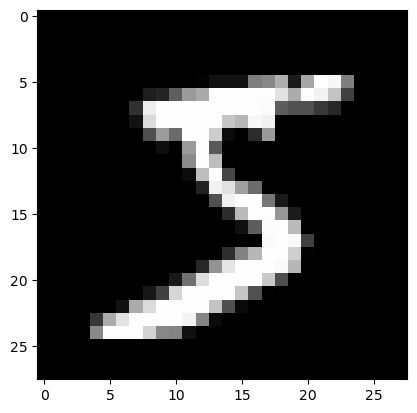

In [17]:
plt.imshow(first_image_esc,cmap='gray')

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train = X_train.reshape(60000,28,28,1)

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

In [22]:
x_test.shape

(10000, 28, 28, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

In [24]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [28]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.8665 - loss: 2.0098 - val_accuracy: 0.1926 - val_loss: 2.2634
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9744 - loss: 0.0899 - val_accuracy: 0.1399 - val_loss: 2.2753
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9834 - loss: 0.0586 - val_accuracy: 0.2089 - val_loss: 2.2758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.1343 - val_loss: 2.2781


In [29]:
model.metrics_names

['loss', 'compile_metrics']

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.932000,0.489997,0.1926,2.263396
1,0.975383,0.087315,0.1399,2.275338
2,0.982800,0.059677,0.2089,2.275818
3,0.984483,0.052293,0.1343,2.278072


<Axes: >

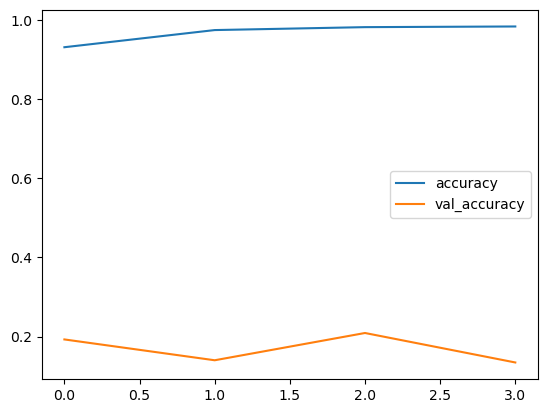

In [32]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

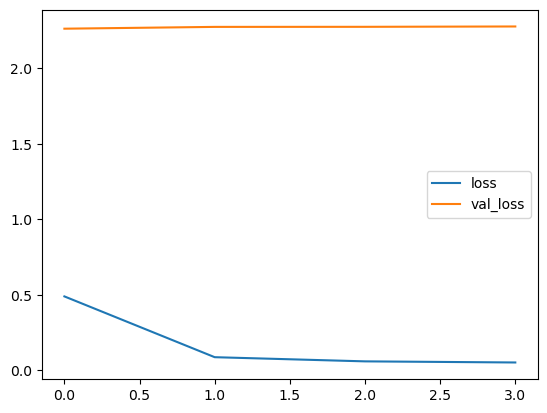

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[2.2780723571777344, 0.13429999351501465]


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [46]:
y_cat_test.shape

(10000, 10)

In [47]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [48]:
predictions[0]

1

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [51]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.12      1.00      0.21      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.84      0.21      0.34       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.13     10000
   macro avg       0.10      0.12      0.05     10000
weighted avg       0.09      0.13      0.06     10000



In [52]:
confusion_matrix(y_test,predictions)

array([[   0,  978,    0,    0,    0,    0,    0,    0,    2,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1029,    0,    0,    0,    0,    0,    0,    3,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,  981,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,  878,    0,    0,    0,    0,    0,    0,   14,    0],
       [   0,  957,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,   18,    0],
       [   0,  766,    0,    0,    0,    0,    0,    0,  208,    0],
       [   0, 1008,    0,    0,    0,    0,    0,    0,    1,    0]],
      dtype=int64)

In [53]:
import seaborn as sns

<Axes: >

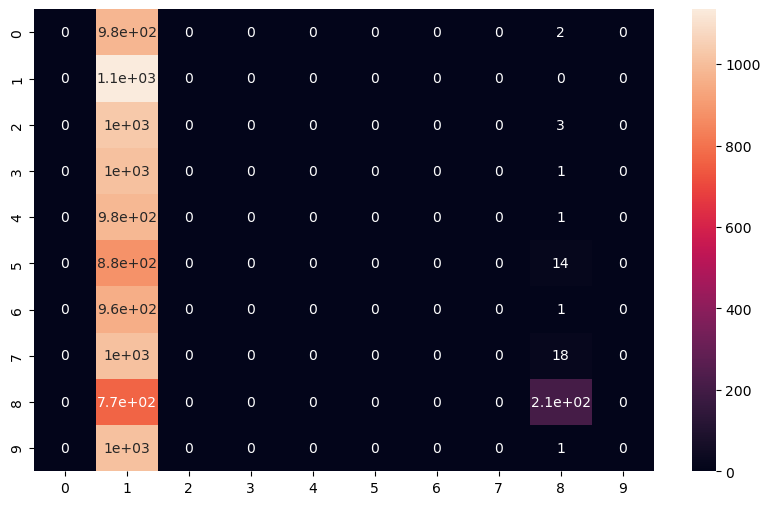

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [61]:
new_image = x_test[0]
new_image.shape

(28, 28, 1)

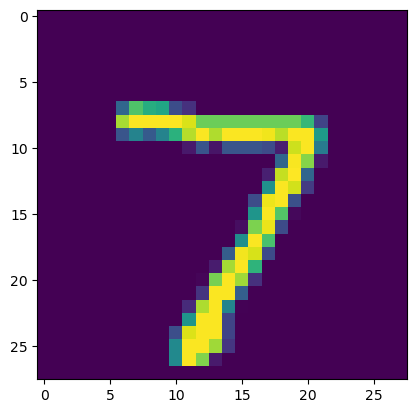

In [62]:
plt.imshow(new_image.reshape(28,28))

In [63]:
new_image = new_image.reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(new_image), axis=-1)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[1]
